In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn
pd.pandas.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('phishingdetectiondataset3.csv')
df.head()


,Unnamed: 0,url,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_underscore,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolon,nb_dollar,nb_space,nb_www,nb_com,nb_tilde,url_length,length_hostname,ratio_digits_url,ratio_digits_host,web_traffic,ip_present,prefix_suffix,https_token,domain_age,dns_record,tiny_url,redirection,url_depth,protocol,protocol_count,special_char,status
0,0,http://www.mobilemoneyavalanche.com/update/www...,5,0,0,1,0,0,0,0,6,0,1,0,0,0,0,2,2,0,88,28,0.03409,0.00000,0,0,0,0,0,0,0,0,4,1,1,1,phishing
1,1,http://www.mayfairfoods.in/wp-content/themes/t...,3,4,0,0,0,0,0,0,7,0,1,0,0,0,0,0,1,0,80,19,0.01250,0.00000,0,0,0,0,0,1,0,0,4,1,1,0,phishing
2,2,http://www.kst365.com/js/?dest&amp;https://sec...,5,0,0,2,2,0,0,0,8,0,2,0,3,0,0,2,2,0,116,14,0.03448,0.21429,0,1,0,0,5238,1,0,1,1,1,2,10,phishing
3,3,http://mail.inifapcirpac.gob.mx/Desarrollo/Sig...,4,1,0,0,0,0,0,0,4,0,1,0,0,0,0,0,0,0,62,24,0.00000,0.00000,0,1,0,0,0,1,0,0,2,1,1,0,phishing
4,4,https://medium.com/@brianforde/hi-matt-that-s-...,1,18,1,1,0,0,0,0,4,0,1,0,0,0,0,1,0,0,149,10,0.06711,0.00000,97,1,0,1,0,1,0,0,2,0,1,2,legitimate


In [3]:
# Statistical summary of the numerical features. 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,7908.0,3922.621523,2282.778438,0.0,1945.750000,3922.50000,5899.25000,7.876000e+03
nb_dots,7908.0,2.923369,2.552535,0.0,1.000000,2.00000,3.00000,2.600000e+01
nb_hyphens,7908.0,3.558042,4.657680,0.0,0.000000,1.00000,7.00000,5.400000e+01
nb_at,7908.0,0.004299,0.067338,0.0,0.000000,0.00000,0.00000,2.000000e+00
nb_qm,7908.0,0.269095,0.525963,0.0,0.000000,0.00000,0.00000,6.000000e+00
nb_and,7908.0,0.357486,1.270756,0.0,0.000000,0.00000,0.00000,1.300000e+01
nb_or,7908.0,0.000000,0.000000,0.0,0.000000,0.00000,0.00000,0.000000e+00
nb_underscore,7908.0,0.359130,1.271039,0.0,0.000000,0.00000,0.00000,2.800000e+01
nb_percent,7908.0,2.728629,11.347460,0.0,0.000000,0.00000,0.00000,1.490000e+02
nb_slash,7908.0,5.746586,2.298628,0.0,4.000000,5.00000,7.00000,1.800000e+01


In [4]:
# dropping unwanted columns: 
df.drop('Unnamed: 0', axis = 1 , inplace = True)

<AxesSubplot:>

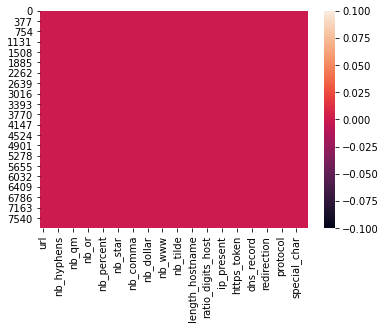

In [20]:
sns.heatmap(df.isnull())

# Exploratory Data Analysis

In [8]:
# identifying the categorical features and the numerical features. 
numerical_features = [feature for feature in df.columns if len(df[feature].unique())\
                       >= 3 and feature != 'url']
categorical_features = [feature for feature in df.columns if feature not in \
                     numerical_features and feature not in ['url','status']]
print("categorical features: ",categorical_features)
print("\nnumerical features: ",numerical_features)

categorical features:  ['nb_or', 'nb_dollar', 'nb_space', 'nb_tilde', 'ip_present', 'prefix_suffix', 'https_token', 'dns_record', 'tiny_url', 'redirection', 'protocol']

numerical features:  ['nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_underscore', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolon', 'nb_www', 'nb_com', 'url_length', 'length_hostname', 'ratio_digits_url', 'ratio_digits_host', 'web_traffic', 'domain_age', 'url_depth', 'protocol_count', 'special_char']


# Numerical Features

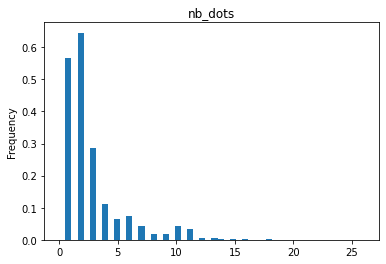

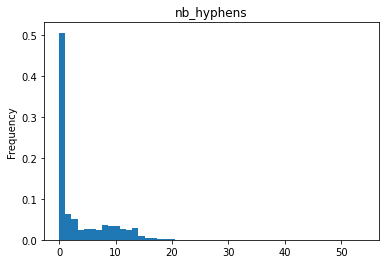

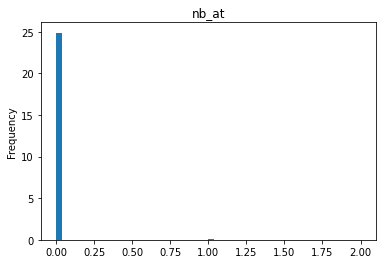

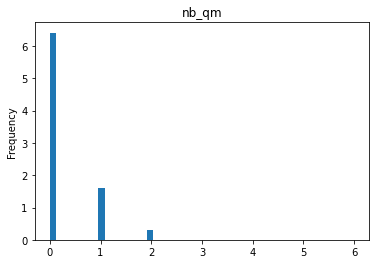

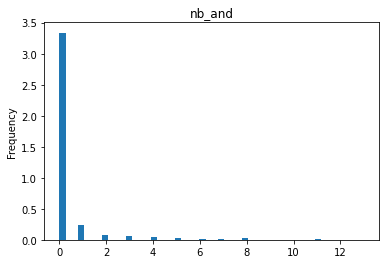

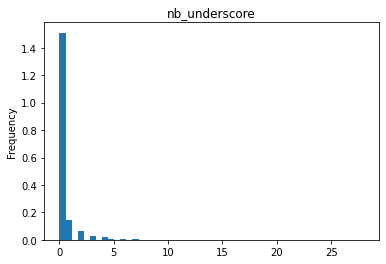

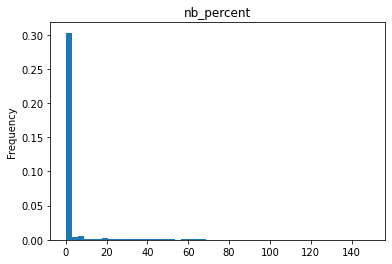

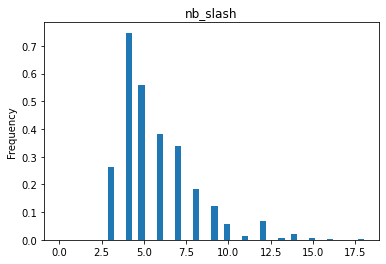

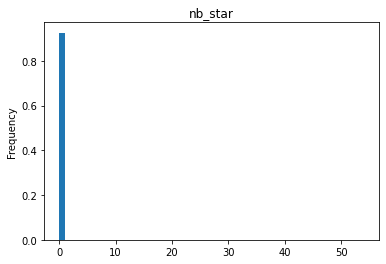

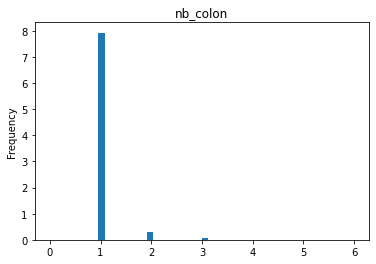

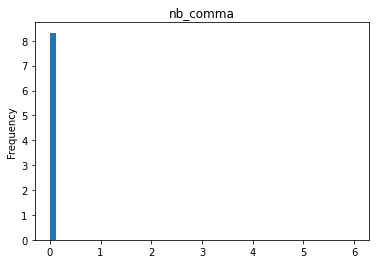

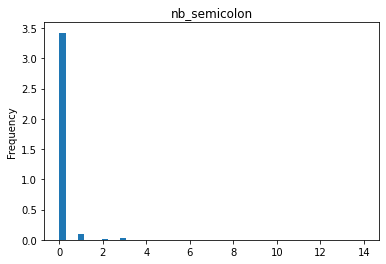

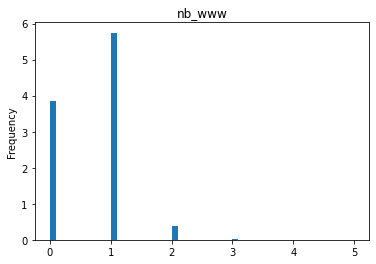

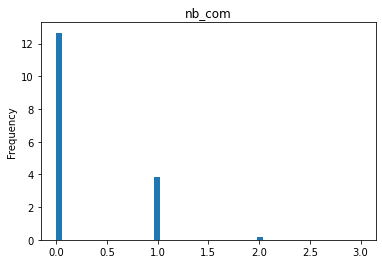

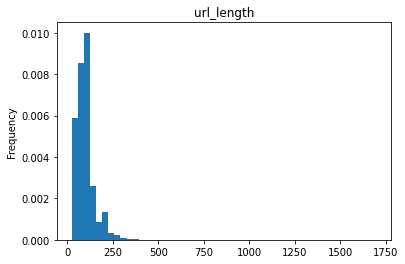

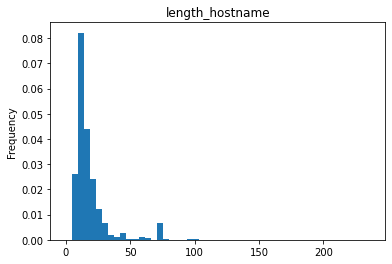

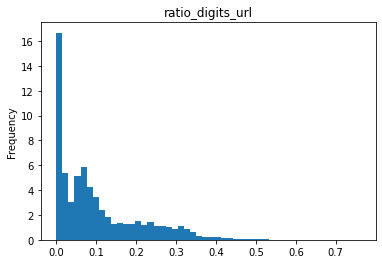

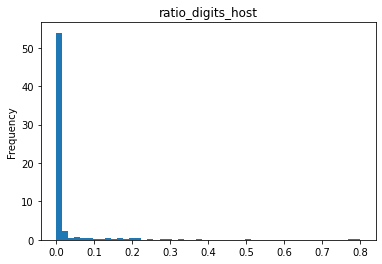

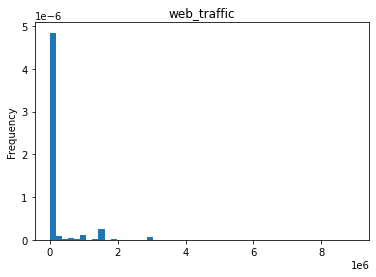

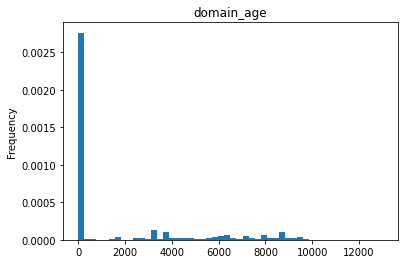

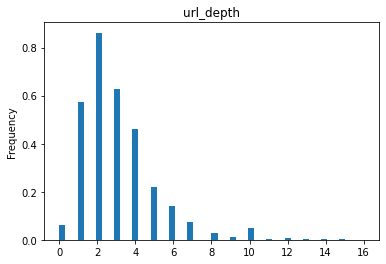

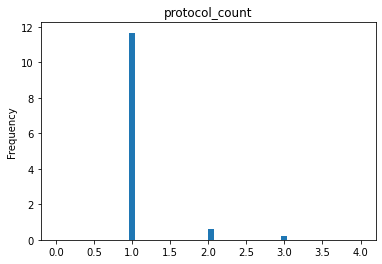

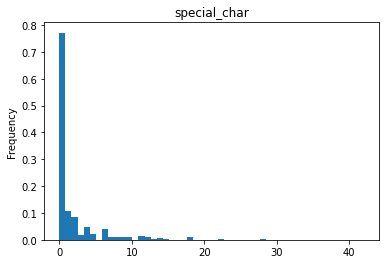

In [12]:
# visualizing the distribution of the numerical features
for feature in numerical_features:
    df[feature].plot.hist(bins = 50 , density = True)
    plt.title(feature)
    plt.show()

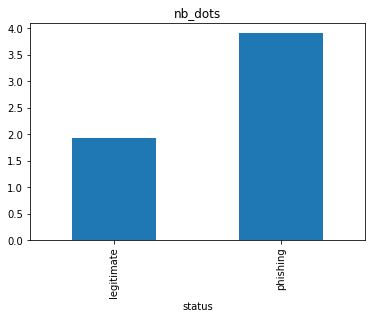

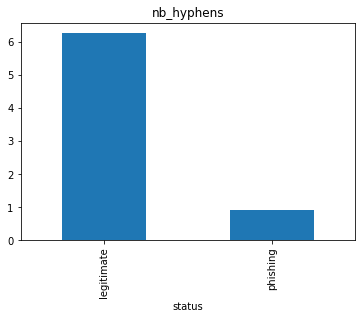

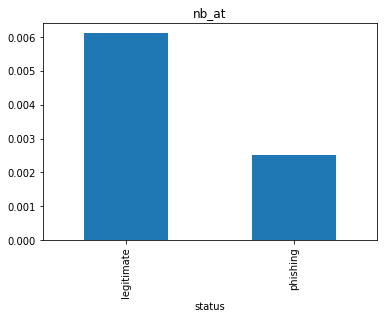

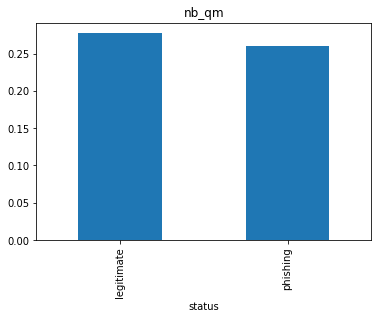

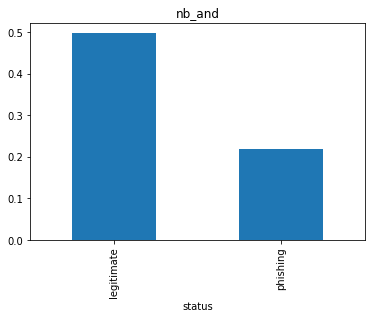

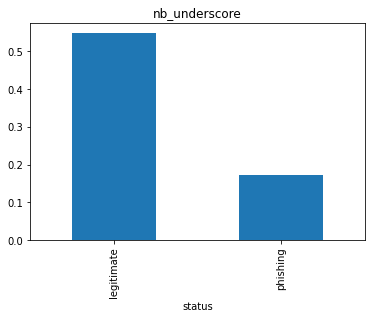

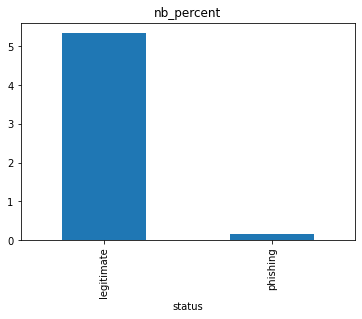

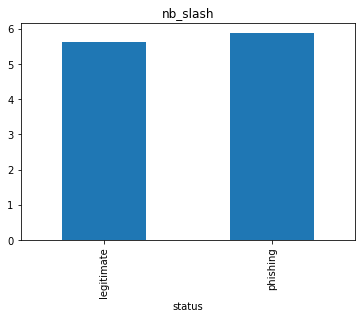

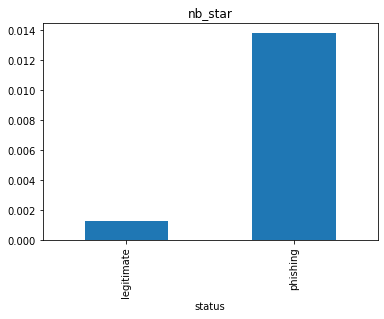

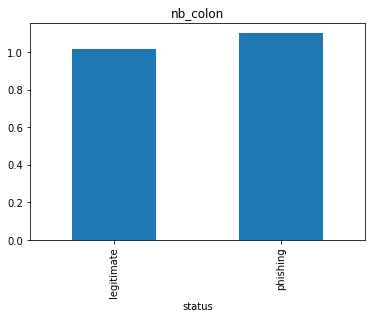

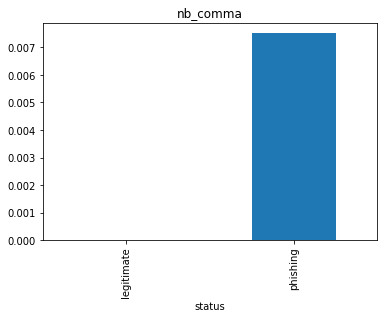

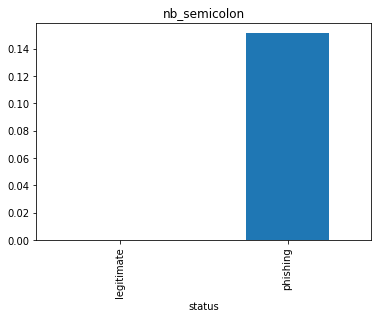

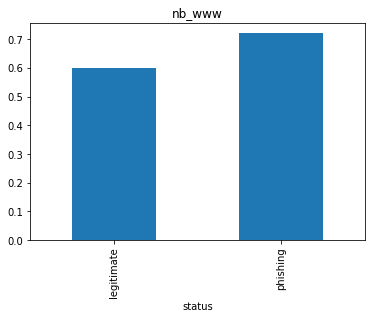

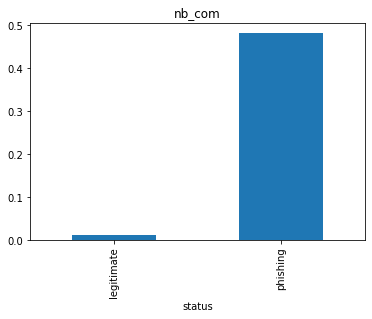

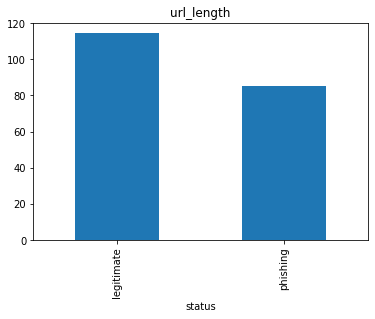

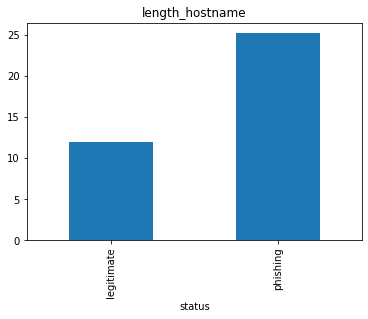

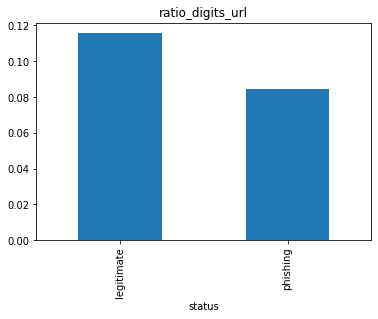

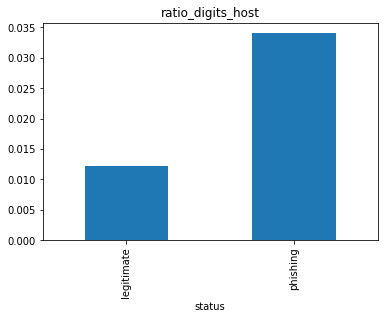

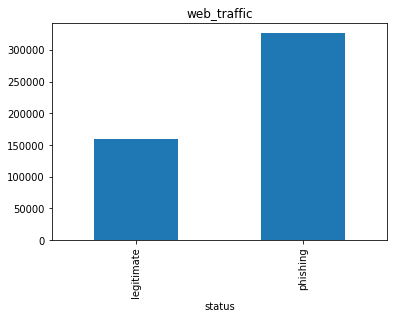

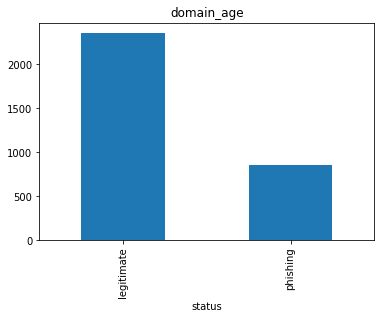

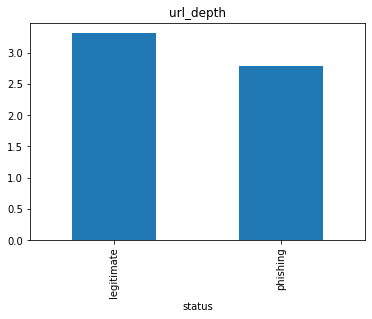

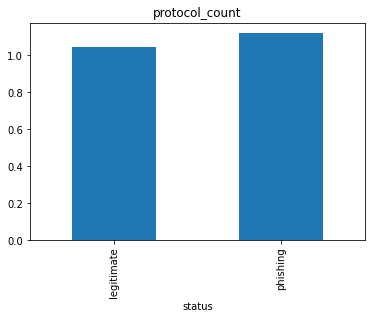

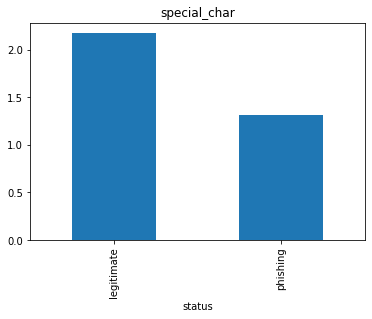

In [14]:
# checking the dependency of numerical features and status 
for feature in numerical_features:
    data = df.copy()
    df.groupby('status')[feature].mean().plot.bar()
    plt.title(feature)
    plt.show()
    

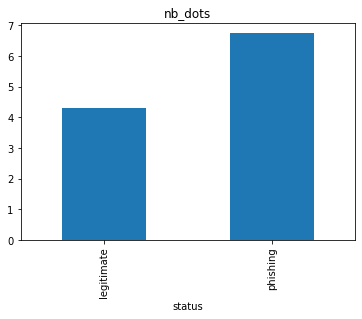

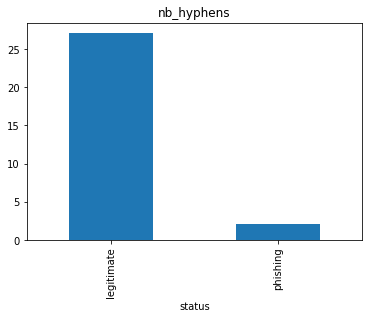

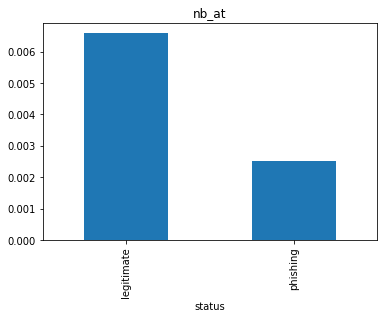

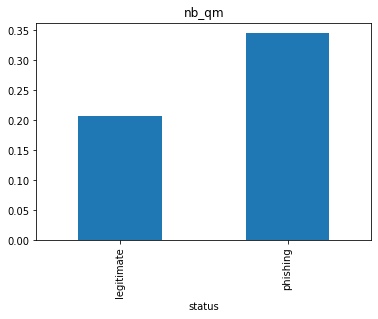

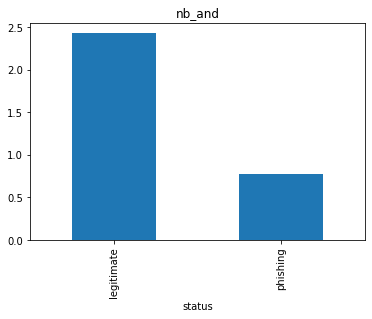

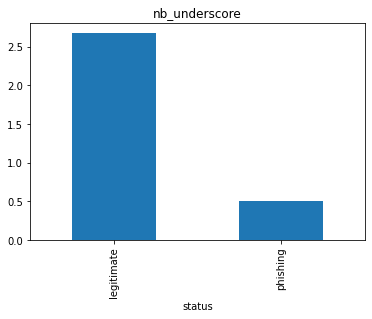

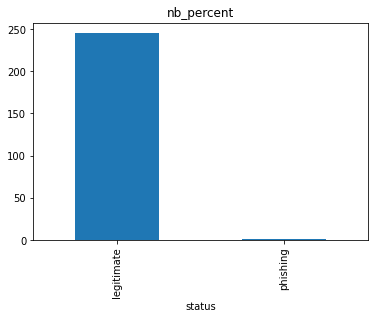

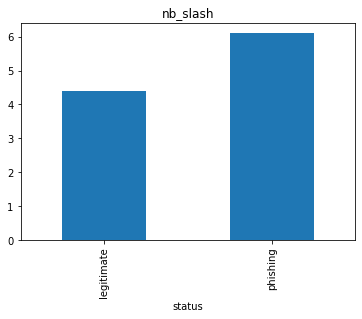

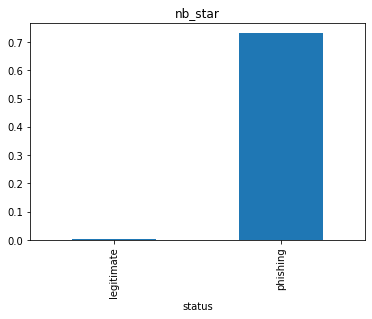

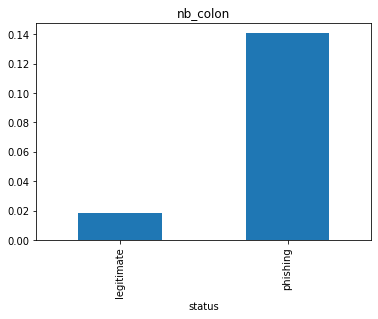

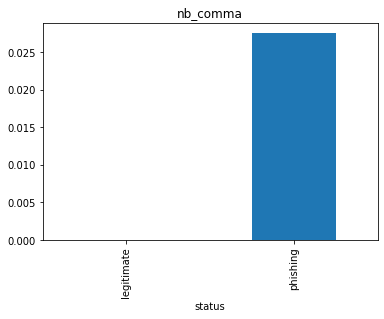

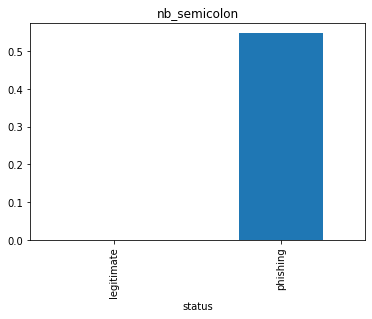

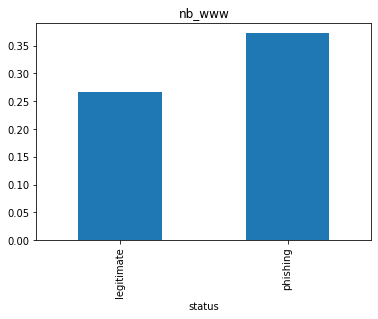

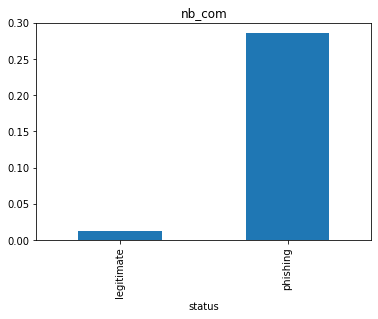

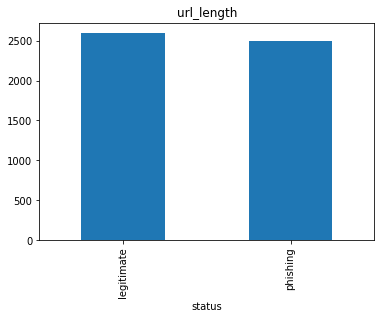

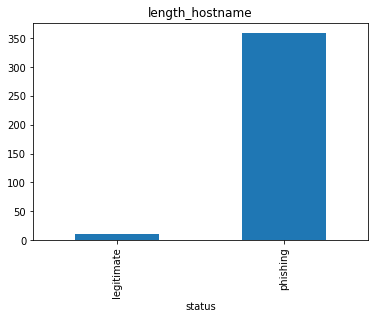

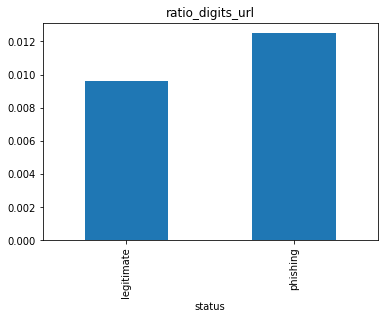

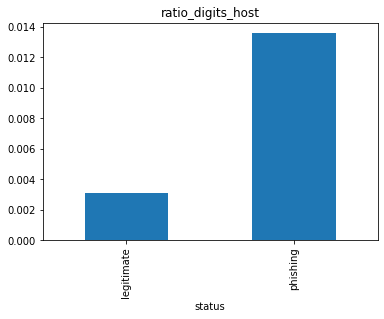

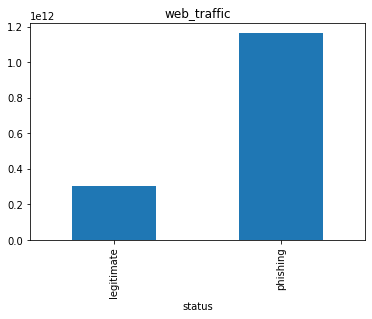

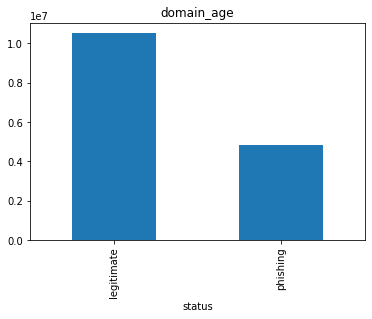

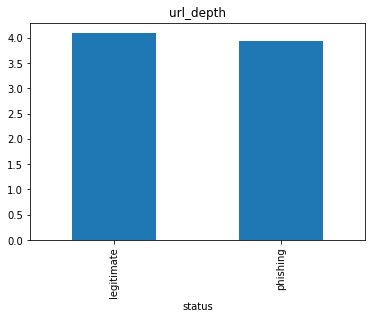

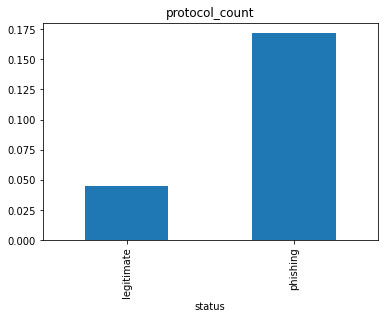

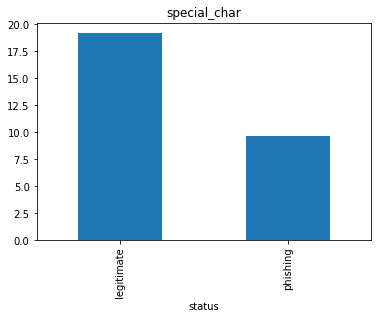

In [15]:
for feature in numerical_features:
    data = df.copy()
    data.groupby('status')[feature].var().plot.bar()
    plt.title(feature)
    plt.show()

<AxesSubplot:>

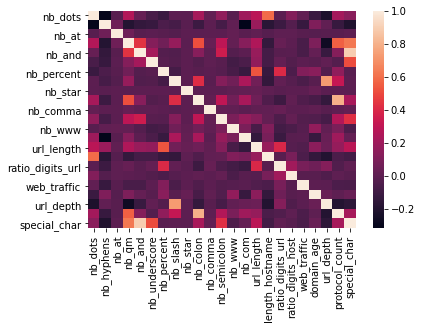

In [22]:
# visualizing the correlation between the numerical features:
sns.heatmap(df[numerical_features].corr())

# Categorical Features

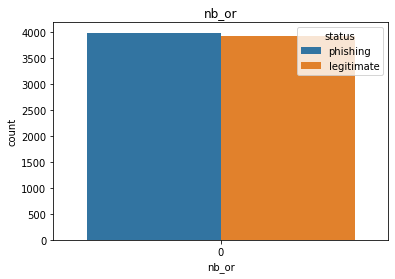

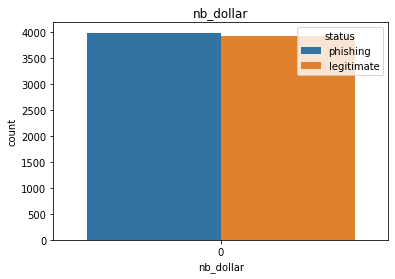

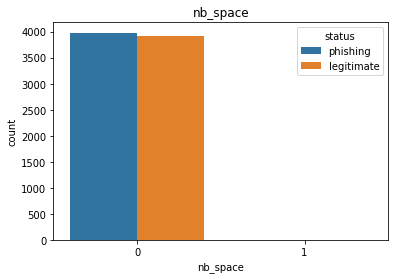

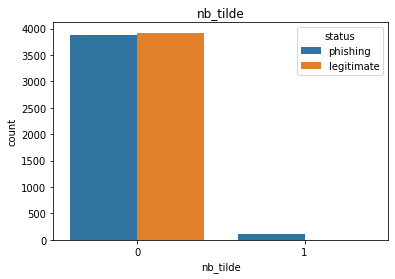

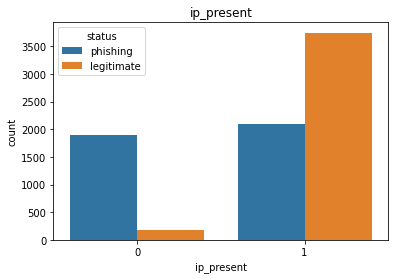

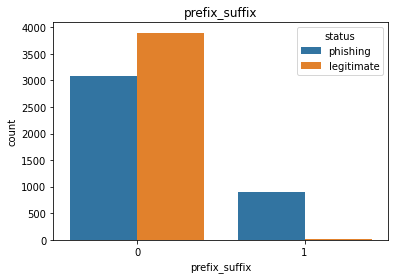

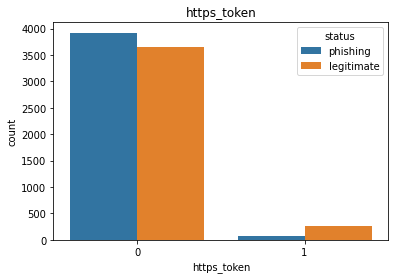

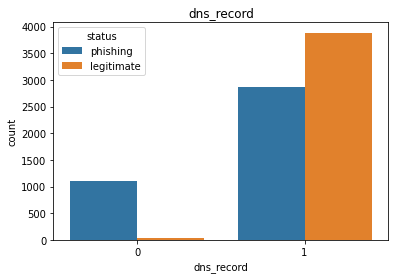

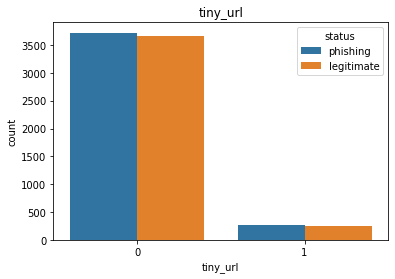

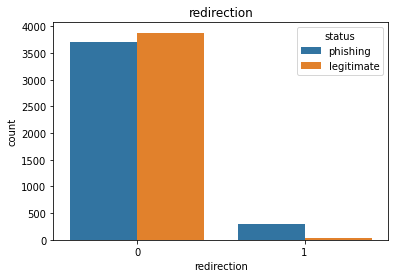

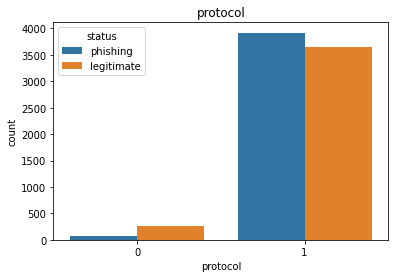

In [28]:
import warnings
warnings.filterwarnings('ignore')
for feature in categorical_features:
    sns.countplot(df[feature], hue = df['status'])
    plt.title(feature)
    plt.show()

# Conclusion